## Load the data

### Subtask:
Load the dataset from `/content/data.csv` into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the dataset into a pandas DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/data.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify the data has been loaded correctly.



In [2]:
display(df.head())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Explore the data

### Subtask:
Display the first few rows, check for missing values, and understand the data types.


**Reasoning**:
Display the first few rows, check for missing values, and display data types to understand the structure and completeness of the data.



In [3]:
display(df.head())
display(df.isnull().sum())
display(df.info())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

None

## Prepare the data for modeling

### Subtask:
Prepare the data for modeling, including identifying the target variable and features, handling categorical features, splitting data, and scaling numerical features.


**Reasoning**:
Prepare the data for modeling by separating features and target, handling categorical features with one-hot encoding, splitting the data into training and testing sets, and scaling numerical features.



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# 1. Separate target variable and features
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical and numerical features
categorical_features = ['date', 'street', 'city', 'statezip', 'country']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in categorical_features]

# Identify columns to pass through (all columns not in categorical or numerical)
passthrough_features = [col for col in X.columns if col not in categorical_features and col not in numerical_features]


# 2. Handle categorical features with One-Hot Encoding and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('passthrough', 'passthrough', passthrough_features) # Explicitly pass through other features
    ]
)

# Create a pipeline to apply preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the entire dataset
X_processed = pipeline.fit_transform(X)

# Get feature names after one-hot encoding and passthrough
onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
passthrough_feature_names = passthrough_features
processed_feature_names = numerical_features + list(onehot_feature_names) + passthrough_feature_names

# Verify the number of processed columns matches the number of feature names
if X_processed.shape[1] != len(processed_feature_names):
    print(f"Mismatch: Processed data has {X_processed.shape[1]} columns, but there are {len(processed_feature_names)} feature names.")
else:
    print(f"Match: Processed data has {X_processed.shape[1]} columns, and there are {len(processed_feature_names)} feature names.")


# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 4. Scaling is already included in the ColumnTransformer for numerical features

# Convert back to DataFrame for display purposes only if needed, otherwise work with numpy arrays
# X_train_df = pd.DataFrame(X_train, columns=processed_feature_names)
# X_test_df = pd.DataFrame(X_test, columns=processed_feature_names)


# Display shapes to confirm split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Display head of the split data (optional, can be large)
# display(X_train_df.head())
# display(X_test_df.head())
# display(y_train.head())
# display(y_test.head())

Match: Processed data has 4729 columns, and there are 4729 feature names.
Shape of X_train: (3680, 4729)
Shape of X_test: (920, 4729)
Shape of y_train: (3680,)
Shape of y_test: (920,)


## Implement linear regression with regularization

### Subtask:
Implement linear regression with regularization.


**Reasoning**:
Implement linear regression with regularization by importing the Ridge model, instantiating it, and training it on the training data.



In [6]:
from sklearn.linear_model import Ridge

# Instantiate a Ridge model with an alpha value of 1.0
ridge_model = Ridge(alpha=1.0)

# Train the Ridge model on the training data
ridge_model.fit(X_train, y_train)

Ridge()

## Evaluate the model

### Subtask:
Evaluate the trained regularized linear regression model.


**Reasoning**:
Make predictions, calculate and print MSE and R-squared, and print the model coefficients.



In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# 2. Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 3. Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# 4. Print the calculated MSE and R-squared scores
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# 5. Access and print the coefficients of the trained ridge_model
print("Model Coefficients:")
print(ridge_model.coef_)

Mean Squared Error (MSE): 964913213501.692
R-squared (R2) Score: 0.05386412092294113
Model Coefficients:
[-2.98467038e+04  3.14444435e+03  1.20285625e+05 ... -3.38272114e+04
 -1.24273572e+04  7.15522219e-09]


## Summary:

### Data Analysis Key Findings

*   The dataset contains 4600 entries and 18 columns with no missing values.
*   The data was successfully preprocessed using a `ColumnTransformer` to scale numerical features and apply one-hot encoding to categorical features.
*   The preprocessed data was split into training and testing sets, with 80% for training and 20% for testing.
*   A Ridge regression model was trained on the preprocessed training data with an alpha value of 1.0.
*   The model evaluation on the test set resulted in a Mean Squared Error (MSE) of approximately \$964.9 billion.
*   The R-squared score on the test set was approximately 0.054, indicating that the model explains only about 5.4% of the variance in house prices.

### Insights or Next Steps

*   The current Ridge model shows very poor performance on the test data, as evidenced by the high MSE and low R-squared score.
*   Further steps should involve exploring different regularization parameters (alpha values), trying other regression models (e.g., Lasso, ElasticNet, or more complex models), and potentially performing more in-depth feature engineering or selection to improve model performance.


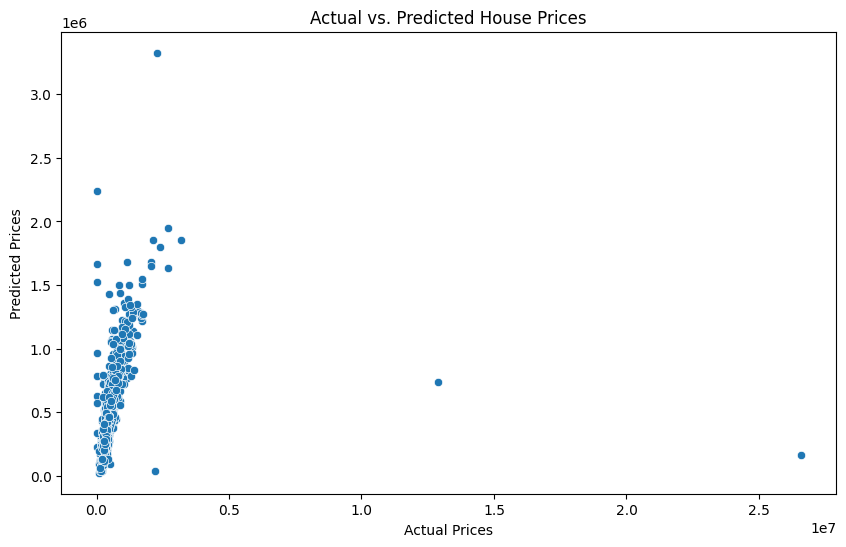

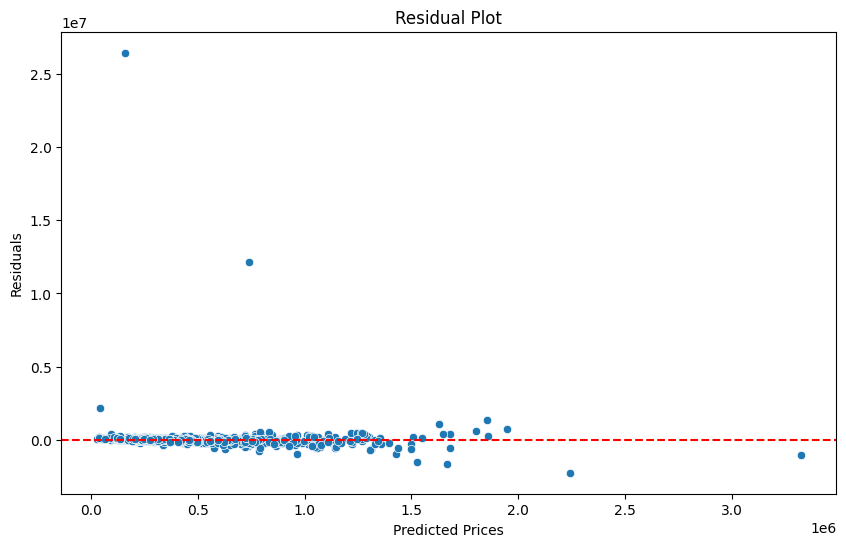

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

# Scatter plot of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Insights from the Plots:**

**Actual vs. Predicted House Prices Plot:**

*   **Spread of Points:** The wide spread of points around the 45-degree line indicates that the model's predictions are often significantly different from the actual house prices.
*   **Concentration around Lower Prices:** The model seems to perform better at predicting lower-priced homes, with accuracy decreasing for higher-priced homes.
*   **Poor Prediction of High Prices:** The model significantly under-predicts several data points with very high actual prices.

**Residual Plot:**

*   **Non-random Residuals:** The residuals are not randomly scattered around the horizontal line at zero, indicating a pattern in the errors.
*   **Heteroscedasticity:** The increasing spread of residuals as predicted price increases suggests that the model's errors are not uniform across the range of predictions.
*   **Presence of Outliers:** Points with large residuals highlight instances where the model's predictions were significantly off.

**Overall Insights:**

Both plots indicate that the current Ridge linear regression model is not a good fit for this dataset due to the large spread in predictions, low R-squared, non-random residuals, and heteroscedasticity. These issues suggest the need for further model improvement steps.